In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [29]:
#define encoder function
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    onehotencode=np.zeros((n_labels,n_unique_labels))
    onehotencode[np.arange(n_labels),labels]=1
    return onehotencode

In [30]:
#reading the dataset
def read_dataset():
    df=pd.read_csv("H:abc/Sonar.csv")
    print(len(df.columns))
    X=df[df.columns[1:60]].values
    y=df[df.columns[60]]
    #encoding the dependent variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return(X,Y,y)

In [31]:
#plot the data
def plot_points(features,labels):
    normal=np.where(labels==0)
    outliers=np.where(labels==1)
    fig=plt.figure(figsize=(10,8))
    plt.plot(features[normal,0],features[normal,1],'bx')
    plt.plot(features[outliers,0],features[outliers,1],'ro')
    plt.xlabel('latency(ms)')
    plt.ylabel('throughput(mb/s)')
    plt.show()

61
(208, 59)


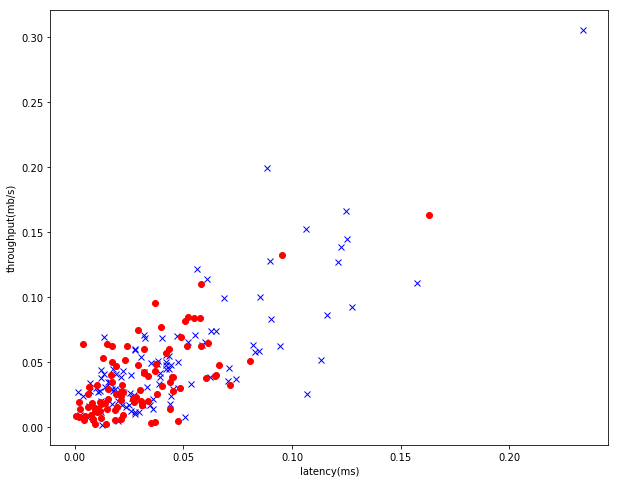

In [32]:
#finally using the data and plotting it
X,Y,y=read_dataset()
plot_points(X,y)

In [33]:
#shuffling
X,Y=shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=415)

In [34]:
print(test_x.shape)

(42, 59)


In [35]:
#defining the important parameters
learning_rate=0.1
epochs=3000
cost_history=np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]#gives columns in x
n_class=2

In [36]:
#define the number of hidden layers and number of neurons in each
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [37]:
x=tf.placeholder(tf.float32,[None,n_dim])
#w=tf.Variable(tf.zeros([n_dim,n_class]))
#b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class])

In [38]:
#define the model
def MLP(x,weights,biases):
    #hidden layer with sigmoid activation
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    #hidden layer with sigmoid activation
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    #hidden layer with sigmoid activation
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    #hidden layer with Relu activation
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.relu(layer_4)
    
    #output layer with linear activation
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer

In [39]:
#define weights and biases for eaach layer
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}


In [40]:
#initialize all the variaables
init=tf.global_variables_initializer()

In [41]:
#call the defined model
y=MLP(x,weights,biases)

#define cost function and optimizer
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
sess=tf.Session()
sess.run(init)

In [42]:
#calculate the cost and accuracy for each epoch
mse_history=[]
accuracy_history=[]
res = []
for epoch in range(epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y=sess.run(y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=sess.run(accuracy,feed_dict={x:test_x,y_:test_y})
    accuracy_history.append(accuracy)
    
    print('epoch :', epoch, '-' 'cost:', cost ,'- MSE:', mse ,'Accuracy', accuracy)
    st = 'Epoch : '+str(epoch)+ ' - Cost : '+ str(cost) +' - MSE : '+ str(mse) + ' - Accuracy : '+str(accuracy)
    res.append(st)
    
out_file = 'out.txt'
with open(out_file , 'w+') as fp:
    for ln in res:
        fp.write(ln+'\n')


epoch : 0 -cost: 53.89514 - MSE: Tensor("Mean_1660:0", shape=(), dtype=float64) Accuracy 0.47619048
epoch : 1 -cost: 3.3763576 - MSE: Tensor("Mean_1662:0", shape=(), dtype=float64) Accuracy 0.47619048
epoch : 2 -cost: 30.912266 - MSE: Tensor("Mean_1664:0", shape=(), dtype=float64) Accuracy 0.52380955
epoch : 3 -cost: 6.6494575 - MSE: Tensor("Mean_1666:0", shape=(), dtype=float64) Accuracy 0.47619048
epoch : 4 -cost: 12.407752 - MSE: Tensor("Mean_1668:0", shape=(), dtype=float64) Accuracy 0.52380955
epoch : 5 -cost: 8.263259 - MSE: Tensor("Mean_1670:0", shape=(), dtype=float64) Accuracy 0.47619048
epoch : 6 -cost: 5.401879 - MSE: Tensor("Mean_1672:0", shape=(), dtype=float64) Accuracy 0.52380955
epoch : 7 -cost: 7.457351 - MSE: Tensor("Mean_1674:0", shape=(), dtype=float64) Accuracy 0.47619048
epoch : 8 -cost: 1.7112268 - MSE: Tensor("Mean_1676:0", shape=(), dtype=float64) Accuracy 0.52380955
epoch : 9 -cost: 5.8532686 - MSE: Tensor("Mean_1678:0", shape=(), dtype=float64) Accuracy 0.476

epoch : 81 -cost: 0.6074071 - MSE: Tensor("Mean_1822:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 82 -cost: 0.57153213 - MSE: Tensor("Mean_1824:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 83 -cost: 0.5564463 - MSE: Tensor("Mean_1826:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 84 -cost: 0.5535221 - MSE: Tensor("Mean_1828:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 85 -cost: 0.5883915 - MSE: Tensor("Mean_1830:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 86 -cost: 0.55942816 - MSE: Tensor("Mean_1832:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 87 -cost: 0.56373984 - MSE: Tensor("Mean_1834:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 88 -cost: 0.5461599 - MSE: Tensor("Mean_1836:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 89 -cost: 0.5663413 - MSE: Tensor("Mean_1838:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 90 -cost: 0.5411382 - MSE: Tensor("Mean_1840:0", shape=(), dtype=float6

epoch : 161 -cost: 0.4656162 - MSE: Tensor("Mean_1982:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 162 -cost: 0.4526973 - MSE: Tensor("Mean_1984:0", shape=(), dtype=float64) Accuracy 0.64285713
epoch : 163 -cost: 0.48924008 - MSE: Tensor("Mean_1986:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 164 -cost: 0.4870602 - MSE: Tensor("Mean_1988:0", shape=(), dtype=float64) Accuracy 0.5
epoch : 165 -cost: 0.48524973 - MSE: Tensor("Mean_1990:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 166 -cost: 0.48063347 - MSE: Tensor("Mean_1992:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 167 -cost: 0.49215996 - MSE: Tensor("Mean_1994:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 168 -cost: 0.4725708 - MSE: Tensor("Mean_1996:0", shape=(), dtype=float64) Accuracy 0.5
epoch : 169 -cost: 0.4704816 - MSE: Tensor("Mean_1998:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 170 -cost: 0.47467488 - MSE: Tensor("Mean_2000:0", shape=(), dtype=float64) Accu

epoch : 241 -cost: 0.40724266 - MSE: Tensor("Mean_2142:0", shape=(), dtype=float64) Accuracy 0.64285713
epoch : 242 -cost: 0.38342956 - MSE: Tensor("Mean_2144:0", shape=(), dtype=float64) Accuracy 0.61904764
epoch : 243 -cost: 0.40188524 - MSE: Tensor("Mean_2146:0", shape=(), dtype=float64) Accuracy 0.64285713
epoch : 244 -cost: 0.38384843 - MSE: Tensor("Mean_2148:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 245 -cost: 0.37242678 - MSE: Tensor("Mean_2150:0", shape=(), dtype=float64) Accuracy 0.6666667
epoch : 246 -cost: 0.3715885 - MSE: Tensor("Mean_2152:0", shape=(), dtype=float64) Accuracy 0.61904764
epoch : 247 -cost: 0.3971957 - MSE: Tensor("Mean_2154:0", shape=(), dtype=float64) Accuracy 0.64285713
epoch : 248 -cost: 0.3899082 - MSE: Tensor("Mean_2156:0", shape=(), dtype=float64) Accuracy 0.54761904
epoch : 249 -cost: 0.3860421 - MSE: Tensor("Mean_2158:0", shape=(), dtype=float64) Accuracy 0.6666667
epoch : 250 -cost: 0.38679275 - MSE: Tensor("Mean_2160:0", shape=(), d

epoch : 321 -cost: 0.34883717 - MSE: Tensor("Mean_2302:0", shape=(), dtype=float64) Accuracy 0.6904762
epoch : 322 -cost: 0.32914224 - MSE: Tensor("Mean_2304:0", shape=(), dtype=float64) Accuracy 0.64285713
epoch : 323 -cost: 0.32027844 - MSE: Tensor("Mean_2306:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 324 -cost: 0.30744767 - MSE: Tensor("Mean_2308:0", shape=(), dtype=float64) Accuracy 0.6904762
epoch : 325 -cost: 0.32568094 - MSE: Tensor("Mean_2310:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 326 -cost: 0.32372147 - MSE: Tensor("Mean_2312:0", shape=(), dtype=float64) Accuracy 0.6666667
epoch : 327 -cost: 0.32404682 - MSE: Tensor("Mean_2314:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 328 -cost: 0.30938715 - MSE: Tensor("Mean_2316:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 329 -cost: 0.31793615 - MSE: Tensor("Mean_2318:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 330 -cost: 0.30062073 - MSE: Tensor("Mean_2320:0", shape=()

epoch : 401 -cost: 0.30930668 - MSE: Tensor("Mean_2462:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 402 -cost: 0.3106625 - MSE: Tensor("Mean_2464:0", shape=(), dtype=float64) Accuracy 0.64285713
epoch : 403 -cost: 0.30312353 - MSE: Tensor("Mean_2466:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 404 -cost: 0.27793083 - MSE: Tensor("Mean_2468:0", shape=(), dtype=float64) Accuracy 0.6904762
epoch : 405 -cost: 0.2973086 - MSE: Tensor("Mean_2470:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 406 -cost: 0.27012467 - MSE: Tensor("Mean_2472:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 407 -cost: 0.24163887 - MSE: Tensor("Mean_2474:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 408 -cost: 0.2332205 - MSE: Tensor("Mean_2476:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 409 -cost: 0.27233437 - MSE: Tensor("Mean_2478:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 410 -cost: 0.28523642 - MSE: Tensor("Mean_2480:0", shape=(), dtype

epoch : 481 -cost: 0.21252358 - MSE: Tensor("Mean_2622:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 482 -cost: 0.19620216 - MSE: Tensor("Mean_2624:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 483 -cost: 0.2231861 - MSE: Tensor("Mean_2626:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 484 -cost: 0.21664019 - MSE: Tensor("Mean_2628:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 485 -cost: 0.21351326 - MSE: Tensor("Mean_2630:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 486 -cost: 0.19663778 - MSE: Tensor("Mean_2632:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 487 -cost: 0.21907322 - MSE: Tensor("Mean_2634:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 488 -cost: 0.20889702 - MSE: Tensor("Mean_2636:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 489 -cost: 0.20490065 - MSE: Tensor("Mean_2638:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 490 -cost: 0.18624334 - MSE: Tensor("Mean_2640:0", shape=(), 

epoch : 561 -cost: 0.15943348 - MSE: Tensor("Mean_2782:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 562 -cost: 0.13913922 - MSE: Tensor("Mean_2784:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 563 -cost: 0.13073616 - MSE: Tensor("Mean_2786:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 564 -cost: 0.13087933 - MSE: Tensor("Mean_2788:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 565 -cost: 0.14382169 - MSE: Tensor("Mean_2790:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 566 -cost: 0.15261856 - MSE: Tensor("Mean_2792:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 567 -cost: 0.175735 - MSE: Tensor("Mean_2794:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 568 -cost: 0.15780137 - MSE: Tensor("Mean_2796:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 569 -cost: 0.16676985 - MSE: Tensor("Mean_2798:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 570 -cost: 0.1583183 - MSE: Tensor("Mean_2800:0", shape=(), dtyp

epoch : 641 -cost: 0.18035313 - MSE: Tensor("Mean_2942:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 642 -cost: 0.22715437 - MSE: Tensor("Mean_2944:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 643 -cost: 0.38352168 - MSE: Tensor("Mean_2946:0", shape=(), dtype=float64) Accuracy 0.6666667
epoch : 644 -cost: 0.41490123 - MSE: Tensor("Mean_2948:0", shape=(), dtype=float64) Accuracy 0.61904764
epoch : 645 -cost: 0.65205216 - MSE: Tensor("Mean_2950:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 646 -cost: 0.50499076 - MSE: Tensor("Mean_2952:0", shape=(), dtype=float64) Accuracy 0.5714286
epoch : 647 -cost: 0.29659417 - MSE: Tensor("Mean_2954:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 648 -cost: 0.20647162 - MSE: Tensor("Mean_2956:0", shape=(), dtype=float64) Accuracy 0.71428573
epoch : 649 -cost: 0.15717135 - MSE: Tensor("Mean_2958:0", shape=(), dtype=float64) Accuracy 0.7380952
epoch : 650 -cost: 0.13095236 - MSE: Tensor("Mean_2960:0", shape=(), d

epoch : 721 -cost: 0.07412479 - MSE: Tensor("Mean_3102:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 722 -cost: 0.0760986 - MSE: Tensor("Mean_3104:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 723 -cost: 0.075277306 - MSE: Tensor("Mean_3106:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 724 -cost: 0.07812981 - MSE: Tensor("Mean_3108:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 725 -cost: 0.074824 - MSE: Tensor("Mean_3110:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 726 -cost: 0.07580491 - MSE: Tensor("Mean_3112:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 727 -cost: 0.07395228 - MSE: Tensor("Mean_3114:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 728 -cost: 0.07313017 - MSE: Tensor("Mean_3116:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 729 -cost: 0.07227069 - MSE: Tensor("Mean_3118:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 730 -cost: 0.07390303 - MSE: Tensor("Mean_3120:0", shape=(), d

epoch : 800 -cost: 0.053876646 - MSE: Tensor("Mean_3260:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 801 -cost: 0.05407879 - MSE: Tensor("Mean_3262:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 802 -cost: 0.053511515 - MSE: Tensor("Mean_3264:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 803 -cost: 0.052520018 - MSE: Tensor("Mean_3266:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 804 -cost: 0.052315827 - MSE: Tensor("Mean_3268:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 805 -cost: 0.05191997 - MSE: Tensor("Mean_3270:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 806 -cost: 0.051532365 - MSE: Tensor("Mean_3272:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 807 -cost: 0.05062636 - MSE: Tensor("Mean_3274:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 808 -cost: 0.050391126 - MSE: Tensor("Mean_3276:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 809 -cost: 0.050645933 - MSE: Tensor("Mean_3278:0", s

epoch : 879 -cost: 0.04114 - MSE: Tensor("Mean_3418:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 880 -cost: 0.040900223 - MSE: Tensor("Mean_3420:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 881 -cost: 0.040933903 - MSE: Tensor("Mean_3422:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 882 -cost: 0.04063524 - MSE: Tensor("Mean_3424:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 883 -cost: 0.04062799 - MSE: Tensor("Mean_3426:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 884 -cost: 0.040168826 - MSE: Tensor("Mean_3428:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 885 -cost: 0.040027834 - MSE: Tensor("Mean_3430:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 886 -cost: 0.0396736 - MSE: Tensor("Mean_3432:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 887 -cost: 0.039145075 - MSE: Tensor("Mean_3434:0", shape=(), dtype=float64) Accuracy 0.7619048
epoch : 888 -cost: 0.038900703 - MSE: Tensor("Mean_3436:0", shape

epoch : 958 -cost: 0.032420132 - MSE: Tensor("Mean_3576:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 959 -cost: 0.032461725 - MSE: Tensor("Mean_3578:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 960 -cost: 0.032237496 - MSE: Tensor("Mean_3580:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 961 -cost: 0.032260403 - MSE: Tensor("Mean_3582:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 962 -cost: 0.03206993 - MSE: Tensor("Mean_3584:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 963 -cost: 0.032114096 - MSE: Tensor("Mean_3586:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 964 -cost: 0.03201508 - MSE: Tensor("Mean_3588:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 965 -cost: 0.03198131 - MSE: Tensor("Mean_3590:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 966 -cost: 0.031904966 - MSE: Tensor("Mean_3592:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 967 -cost: 0.031811245 - MSE: Tensor("Mean_3594:0"

epoch : 1036 -cost: 0.026397217 - MSE: Tensor("Mean_3732:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1037 -cost: 0.026496984 - MSE: Tensor("Mean_3734:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1038 -cost: 0.026421662 - MSE: Tensor("Mean_3736:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1039 -cost: 0.026275063 - MSE: Tensor("Mean_3738:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1040 -cost: 0.026334662 - MSE: Tensor("Mean_3740:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1041 -cost: 0.026206732 - MSE: Tensor("Mean_3742:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1042 -cost: 0.02632612 - MSE: Tensor("Mean_3744:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1043 -cost: 0.02615419 - MSE: Tensor("Mean_3746:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1044 -cost: 0.026174605 - MSE: Tensor("Mean_3748:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1045 -cost: 0.02599393 - MSE: Tensor("Me

epoch : 1114 -cost: 0.021906912 - MSE: Tensor("Mean_3888:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1115 -cost: 0.021765895 - MSE: Tensor("Mean_3890:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1116 -cost: 0.021791644 - MSE: Tensor("Mean_3892:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1117 -cost: 0.021765757 - MSE: Tensor("Mean_3894:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1118 -cost: 0.021640323 - MSE: Tensor("Mean_3896:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1119 -cost: 0.021650327 - MSE: Tensor("Mean_3898:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1120 -cost: 0.021569714 - MSE: Tensor("Mean_3900:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1121 -cost: 0.021530472 - MSE: Tensor("Mean_3902:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1122 -cost: 0.021456622 - MSE: Tensor("Mean_3904:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1123 -cost: 0.021411717 - MSE: Tensor(

epoch : 1192 -cost: 0.018149212 - MSE: Tensor("Mean_4044:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1193 -cost: 0.018196292 - MSE: Tensor("Mean_4046:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1194 -cost: 0.018078078 - MSE: Tensor("Mean_4048:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1195 -cost: 0.017969355 - MSE: Tensor("Mean_4050:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1196 -cost: 0.017990999 - MSE: Tensor("Mean_4052:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1197 -cost: 0.017907957 - MSE: Tensor("Mean_4054:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1198 -cost: 0.017876444 - MSE: Tensor("Mean_4056:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1199 -cost: 0.017867172 - MSE: Tensor("Mean_4058:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1200 -cost: 0.017801037 - MSE: Tensor("Mean_4060:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1201 -cost: 0.017786331 - MSE: Tensor(

epoch : 1270 -cost: 0.015242457 - MSE: Tensor("Mean_4200:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1271 -cost: 0.01512638 - MSE: Tensor("Mean_4202:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1272 -cost: 0.015088677 - MSE: Tensor("Mean_4204:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1273 -cost: 0.015084974 - MSE: Tensor("Mean_4206:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1274 -cost: 0.015025703 - MSE: Tensor("Mean_4208:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1275 -cost: 0.015032566 - MSE: Tensor("Mean_4210:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1276 -cost: 0.014956074 - MSE: Tensor("Mean_4212:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1277 -cost: 0.014927972 - MSE: Tensor("Mean_4214:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1278 -cost: 0.0149198035 - MSE: Tensor("Mean_4216:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1279 -cost: 0.014854568 - MSE: Tensor("Mean

epoch : 1348 -cost: 0.012877786 - MSE: Tensor("Mean_4356:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1349 -cost: 0.012817438 - MSE: Tensor("Mean_4358:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1350 -cost: 0.012829798 - MSE: Tensor("Mean_4360:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1351 -cost: 0.012771203 - MSE: Tensor("Mean_4362:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1352 -cost: 0.012751931 - MSE: Tensor("Mean_4364:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1353 -cost: 0.012731921 - MSE: Tensor("Mean_4366:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1354 -cost: 0.012683778 - MSE: Tensor("Mean_4368:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1355 -cost: 0.012698735 - MSE: Tensor("Mean_4370:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 1356 -cost: 0.012640963 - MSE: Tensor("Mean_4372:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1357 -cost: 0.012649111 - MSE: Tensor("Mean_4

epoch : 1427 -cost: 0.011013395 - MSE: Tensor("Mean_4514:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1428 -cost: 0.010970938 - MSE: Tensor("Mean_4516:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1429 -cost: 0.010961434 - MSE: Tensor("Mean_4518:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1430 -cost: 0.0109336395 - MSE: Tensor("Mean_4520:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1431 -cost: 0.010907827 - MSE: Tensor("Mean_4522:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1432 -cost: 0.010908534 - MSE: Tensor("Mean_4524:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1433 -cost: 0.010866832 - MSE: Tensor("Mean_4526:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1434 -cost: 0.010876975 - MSE: Tensor("Mean_4528:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1435 -cost: 0.010821986 - MSE: Tensor("Mean_4530:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1436 -cost: 0.01081123 - MSE: Tensor("Mean_453

epoch : 1506 -cost: 0.0095345015 - MSE: Tensor("Mean_4672:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1507 -cost: 0.009505797 - MSE: Tensor("Mean_4674:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1508 -cost: 0.009505329 - MSE: Tensor("Mean_4676:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1509 -cost: 0.009484215 - MSE: Tensor("Mean_4678:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1510 -cost: 0.0094849365 - MSE: Tensor("Mean_4680:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1511 -cost: 0.009454254 - MSE: Tensor("Mean_4682:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1512 -cost: 0.009452933 - MSE: Tensor("Mean_4684:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1513 -cost: 0.009418784 - MSE: Tensor("Mean_4686:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1514 -cost: 0.009401166 - MSE: Tensor("Mean_4688:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1515 -cost: 0.009386739 - MSE: Tensor("Mean_4

epoch : 1585 -cost: 0.008370752 - MSE: Tensor("Mean_4830:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1586 -cost: 0.008348461 - MSE: Tensor("Mean_4832:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1587 -cost: 0.008337277 - MSE: Tensor("Mean_4834:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1588 -cost: 0.008338121 - MSE: Tensor("Mean_4836:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1589 -cost: 0.008308597 - MSE: Tensor("Mean_4838:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1590 -cost: 0.008309942 - MSE: Tensor("Mean_4840:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1591 -cost: 0.008287587 - MSE: Tensor("Mean_4842:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1592 -cost: 0.008277515 - MSE: Tensor("Mean_4844:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1593 -cost: 0.008256498 - MSE: Tensor("Mean_4846:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1594 -cost: 0.008255933 - MSE: Tensor("Mean_484

epoch : 1663 -cost: 0.007433561 - MSE: Tensor("Mean_4986:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1664 -cost: 0.0074312766 - MSE: Tensor("Mean_4988:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1665 -cost: 0.0074053104 - MSE: Tensor("Mean_4990:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1666 -cost: 0.007407292 - MSE: Tensor("Mean_4992:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1667 -cost: 0.007382933 - MSE: Tensor("Mean_4994:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1668 -cost: 0.007381586 - MSE: Tensor("Mean_4996:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1669 -cost: 0.007377478 - MSE: Tensor("Mean_4998:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1670 -cost: 0.0073522087 - MSE: Tensor("Mean_5000:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1671 -cost: 0.0073528793 - MSE: Tensor("Mean_5002:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1672 -cost: 0.007330929 - MSE: Tensor("Mean

epoch : 1741 -cost: 0.0066554495 - MSE: Tensor("Mean_5142:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1742 -cost: 0.006658652 - MSE: Tensor("Mean_5144:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1743 -cost: 0.006639821 - MSE: Tensor("Mean_5146:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1744 -cost: 0.0066302535 - MSE: Tensor("Mean_5148:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1745 -cost: 0.0066274167 - MSE: Tensor("Mean_5150:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1746 -cost: 0.0066131926 - MSE: Tensor("Mean_5152:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1747 -cost: 0.006618138 - MSE: Tensor("Mean_5154:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1748 -cost: 0.0065926937 - MSE: Tensor("Mean_5156:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1749 -cost: 0.0065942816 - MSE: Tensor("Mean_5158:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1750 -cost: 0.006581272 - MSE: Tensor("Me

epoch : 1819 -cost: 0.006026182 - MSE: Tensor("Mean_5298:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1820 -cost: 0.0060142726 - MSE: Tensor("Mean_5300:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1821 -cost: 0.006014785 - MSE: Tensor("Mean_5302:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1822 -cost: 0.0060012294 - MSE: Tensor("Mean_5304:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1823 -cost: 0.005993803 - MSE: Tensor("Mean_5306:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1824 -cost: 0.005993383 - MSE: Tensor("Mean_5308:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1825 -cost: 0.0059799994 - MSE: Tensor("Mean_5310:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1826 -cost: 0.005971481 - MSE: Tensor("Mean_5312:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1827 -cost: 0.005966344 - MSE: Tensor("Mean_5314:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1828 -cost: 0.0059661358 - MSE: Tensor("Mean

epoch : 1897 -cost: 0.005489294 - MSE: Tensor("Mean_5454:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1898 -cost: 0.0054776273 - MSE: Tensor("Mean_5456:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1899 -cost: 0.0054800003 - MSE: Tensor("Mean_5458:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1900 -cost: 0.0054670614 - MSE: Tensor("Mean_5460:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1901 -cost: 0.0054595224 - MSE: Tensor("Mean_5462:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1902 -cost: 0.005457366 - MSE: Tensor("Mean_5464:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1903 -cost: 0.0054442845 - MSE: Tensor("Mean_5466:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1904 -cost: 0.0054423236 - MSE: Tensor("Mean_5468:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1905 -cost: 0.0054362253 - MSE: Tensor("Mean_5470:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1906 -cost: 0.0054270504 - MSE: Tensor("

epoch : 1975 -cost: 0.0050295615 - MSE: Tensor("Mean_5610:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1976 -cost: 0.005021171 - MSE: Tensor("Mean_5612:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1977 -cost: 0.0050196187 - MSE: Tensor("Mean_5614:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1978 -cost: 0.005011078 - MSE: Tensor("Mean_5616:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1979 -cost: 0.005011236 - MSE: Tensor("Mean_5618:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1980 -cost: 0.004999779 - MSE: Tensor("Mean_5620:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1981 -cost: 0.004996429 - MSE: Tensor("Mean_5622:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1982 -cost: 0.0049955556 - MSE: Tensor("Mean_5624:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1983 -cost: 0.0049830275 - MSE: Tensor("Mean_5626:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 1984 -cost: 0.00498502 - MSE: Tensor("Mean_

epoch : 2053 -cost: 0.004641543 - MSE: Tensor("Mean_5766:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2054 -cost: 0.004631771 - MSE: Tensor("Mean_5768:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2055 -cost: 0.004626481 - MSE: Tensor("Mean_5770:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2056 -cost: 0.0046238555 - MSE: Tensor("Mean_5772:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2057 -cost: 0.004617671 - MSE: Tensor("Mean_5774:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2058 -cost: 0.0046185968 - MSE: Tensor("Mean_5776:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2059 -cost: 0.0046091196 - MSE: Tensor("Mean_5778:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2060 -cost: 0.0046040174 - MSE: Tensor("Mean_5780:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2061 -cost: 0.004600452 - MSE: Tensor("Mean_5782:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2062 -cost: 0.0045931255 - MSE: Tensor("Mea

epoch : 2131 -cost: 0.0042953505 - MSE: Tensor("Mean_5922:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2132 -cost: 0.0042925724 - MSE: Tensor("Mean_5924:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2133 -cost: 0.0042870557 - MSE: Tensor("Mean_5926:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2134 -cost: 0.004285502 - MSE: Tensor("Mean_5928:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2135 -cost: 0.0042788032 - MSE: Tensor("Mean_5930:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2136 -cost: 0.0042769304 - MSE: Tensor("Mean_5932:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2137 -cost: 0.0042732647 - MSE: Tensor("Mean_5934:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2138 -cost: 0.0042682644 - MSE: Tensor("Mean_5936:0", shape=(), dtype=float64) Accuracy 0.8095238
epoch : 2139 -cost: 0.004266238 - MSE: Tensor("Mean_5938:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2140 -cost: 0.004258724 - MSE: Tensor("

epoch : 2209 -cost: 0.0040002116 - MSE: Tensor("Mean_6078:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2210 -cost: 0.0039941566 - MSE: Tensor("Mean_6080:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2211 -cost: 0.0039912756 - MSE: Tensor("Mean_6082:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2212 -cost: 0.0039884206 - MSE: Tensor("Mean_6084:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2213 -cost: 0.0039820783 - MSE: Tensor("Mean_6086:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2214 -cost: 0.0039808475 - MSE: Tensor("Mean_6088:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2215 -cost: 0.0039770897 - MSE: Tensor("Mean_6090:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2216 -cost: 0.003974986 - MSE: Tensor("Mean_6092:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2217 -cost: 0.0039673117 - MSE: Tensor("Mean_6094:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2218 -cost: 0.003966767 - MSE:

epoch : 2286 -cost: 0.0037394902 - MSE: Tensor("Mean_6232:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2287 -cost: 0.0037322196 - MSE: Tensor("Mean_6234:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2288 -cost: 0.0037309171 - MSE: Tensor("Mean_6236:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2289 -cost: 0.0037268605 - MSE: Tensor("Mean_6238:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2290 -cost: 0.003724262 - MSE: Tensor("Mean_6240:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2291 -cost: 0.0037207715 - MSE: Tensor("Mean_6242:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2292 -cost: 0.0037201052 - MSE: Tensor("Mean_6244:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2293 -cost: 0.003713295 - MSE: Tensor("Mean_6246:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2294 -cost: 0.003711527 - MSE: Tensor("Mean_6248:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2295 -cost: 0.003710295 - MSE: T

epoch : 2363 -cost: 0.0035040108 - MSE: Tensor("Mean_6386:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2364 -cost: 0.0035007438 - MSE: Tensor("Mean_6388:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2365 -cost: 0.0034991384 - MSE: Tensor("Mean_6390:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2366 -cost: 0.0034951894 - MSE: Tensor("Mean_6392:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2367 -cost: 0.003491911 - MSE: Tensor("Mean_6394:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2368 -cost: 0.0034912473 - MSE: Tensor("Mean_6396:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2369 -cost: 0.003486367 - MSE: Tensor("Mean_6398:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2370 -cost: 0.003485047 - MSE: Tensor("Mean_6400:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2371 -cost: 0.0034804984 - MSE: Tensor("Mean_6402:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2372 -cost: 0.0034774616 - MSE: 

epoch : 2440 -cost: 0.003292948 - MSE: Tensor("Mean_6540:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2441 -cost: 0.0032923995 - MSE: Tensor("Mean_6542:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2442 -cost: 0.0032875214 - MSE: Tensor("Mean_6544:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2443 -cost: 0.0032869412 - MSE: Tensor("Mean_6546:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2444 -cost: 0.0032832145 - MSE: Tensor("Mean_6548:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2445 -cost: 0.0032824439 - MSE: Tensor("Mean_6550:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2446 -cost: 0.0032768282 - MSE: Tensor("Mean_6552:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2447 -cost: 0.003277184 - MSE: Tensor("Mean_6554:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2448 -cost: 0.0032719823 - MSE: Tensor("Mean_6556:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2449 -cost: 0.0032711115 - MSE:

epoch : 2517 -cost: 0.0031016732 - MSE: Tensor("Mean_6694:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2518 -cost: 0.0031023424 - MSE: Tensor("Mean_6696:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2519 -cost: 0.0030967414 - MSE: Tensor("Mean_6698:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2520 -cost: 0.0030961018 - MSE: Tensor("Mean_6700:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2521 -cost: 0.0030943162 - MSE: Tensor("Mean_6702:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2522 -cost: 0.0030907295 - MSE: Tensor("Mean_6704:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2523 -cost: 0.0030888324 - MSE: Tensor("Mean_6706:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2524 -cost: 0.0030858065 - MSE: Tensor("Mean_6708:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2525 -cost: 0.003085679 - MSE: Tensor("Mean_6710:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2526 -cost: 0.0030806733 - MSE

epoch : 2594 -cost: 0.002930172 - MSE: Tensor("Mean_6848:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2595 -cost: 0.0029287473 - MSE: Tensor("Mean_6850:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2596 -cost: 0.0029261068 - MSE: Tensor("Mean_6852:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2597 -cost: 0.0029247482 - MSE: Tensor("Mean_6854:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2598 -cost: 0.0029232444 - MSE: Tensor("Mean_6856:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2599 -cost: 0.0029204441 - MSE: Tensor("Mean_6858:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2600 -cost: 0.0029178 - MSE: Tensor("Mean_6860:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2601 -cost: 0.0029154294 - MSE: Tensor("Mean_6862:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2602 -cost: 0.0029152753 - MSE: Tensor("Mean_6864:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2603 -cost: 0.0029113186 - MSE: T

epoch : 2671 -cost: 0.0027741613 - MSE: Tensor("Mean_7002:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2672 -cost: 0.0027712658 - MSE: Tensor("Mean_7004:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2673 -cost: 0.0027707645 - MSE: Tensor("Mean_7006:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2674 -cost: 0.0027689387 - MSE: Tensor("Mean_7008:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2675 -cost: 0.0027669813 - MSE: Tensor("Mean_7010:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2676 -cost: 0.0027651242 - MSE: Tensor("Mean_7012:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2677 -cost: 0.0027629137 - MSE: Tensor("Mean_7014:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2678 -cost: 0.002761406 - MSE: Tensor("Mean_7016:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2679 -cost: 0.0027581875 - MSE: Tensor("Mean_7018:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2680 -cost: 0.002757285 - MSE:

epoch : 2748 -cost: 0.0026313697 - MSE: Tensor("Mean_7156:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2749 -cost: 0.0026299988 - MSE: Tensor("Mean_7158:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2750 -cost: 0.0026289776 - MSE: Tensor("Mean_7160:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2751 -cost: 0.002626778 - MSE: Tensor("Mean_7162:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2752 -cost: 0.002625443 - MSE: Tensor("Mean_7164:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2753 -cost: 0.002622705 - MSE: Tensor("Mean_7166:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2754 -cost: 0.0026215632 - MSE: Tensor("Mean_7168:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2755 -cost: 0.0026206418 - MSE: Tensor("Mean_7170:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2756 -cost: 0.0026174828 - MSE: Tensor("Mean_7172:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2757 -cost: 0.0026156546 - MSE: 

epoch : 2825 -cost: 0.0024999664 - MSE: Tensor("Mean_7310:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2826 -cost: 0.0024982076 - MSE: Tensor("Mean_7312:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2827 -cost: 0.0024973988 - MSE: Tensor("Mean_7314:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2828 -cost: 0.0024948586 - MSE: Tensor("Mean_7316:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2829 -cost: 0.0024932856 - MSE: Tensor("Mean_7318:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2830 -cost: 0.002490716 - MSE: Tensor("Mean_7320:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2831 -cost: 0.0024890434 - MSE: Tensor("Mean_7322:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2832 -cost: 0.0024888478 - MSE: Tensor("Mean_7324:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2833 -cost: 0.002485586 - MSE: Tensor("Mean_7326:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2834 -cost: 0.0024851577 - MSE:

epoch : 2902 -cost: 0.0023784437 - MSE: Tensor("Mean_7464:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2903 -cost: 0.0023770176 - MSE: Tensor("Mean_7466:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2904 -cost: 0.0023753317 - MSE: Tensor("Mean_7468:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2905 -cost: 0.0023735065 - MSE: Tensor("Mean_7470:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2906 -cost: 0.0023739208 - MSE: Tensor("Mean_7472:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2907 -cost: 0.002370817 - MSE: Tensor("Mean_7474:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2908 -cost: 0.0023708958 - MSE: Tensor("Mean_7476:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2909 -cost: 0.0023688136 - MSE: Tensor("Mean_7478:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2910 -cost: 0.002367425 - MSE: Tensor("Mean_7480:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2911 -cost: 0.0023647295 - MSE:

epoch : 2979 -cost: 0.002268322 - MSE: Tensor("Mean_7618:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2980 -cost: 0.0022670974 - MSE: Tensor("Mean_7620:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2981 -cost: 0.0022660193 - MSE: Tensor("Mean_7622:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2982 -cost: 0.002264571 - MSE: Tensor("Mean_7624:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2983 -cost: 0.002264308 - MSE: Tensor("Mean_7626:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2984 -cost: 0.00226127 - MSE: Tensor("Mean_7628:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2985 -cost: 0.0022599192 - MSE: Tensor("Mean_7630:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2986 -cost: 0.002259544 - MSE: Tensor("Mean_7632:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2987 -cost: 0.0022570582 - MSE: Tensor("Mean_7634:0", shape=(), dtype=float64) Accuracy 0.78571427
epoch : 2988 -cost: 0.0022564705 - MSE: Ten

In [20]:
import os 
os.getcwd()

'C:\\Users\\Prateek'

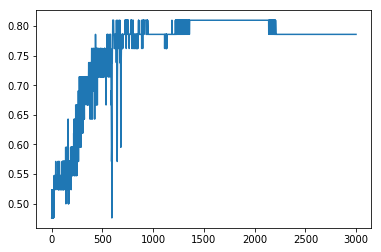

In [43]:
#plot accuracy graph

plt.plot(accuracy_history)
plt.show()

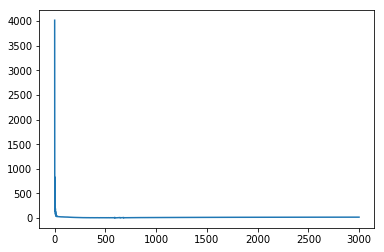

In [44]:
#plot mse graph
plt.plot( mse_history)
plt.show()